In [2]:
import pandas as pd
import numpy as np
from data_process import *
from metadata import *
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import seaborn as sns

init_notebook_mode(connected=True)
cf.go_offline()

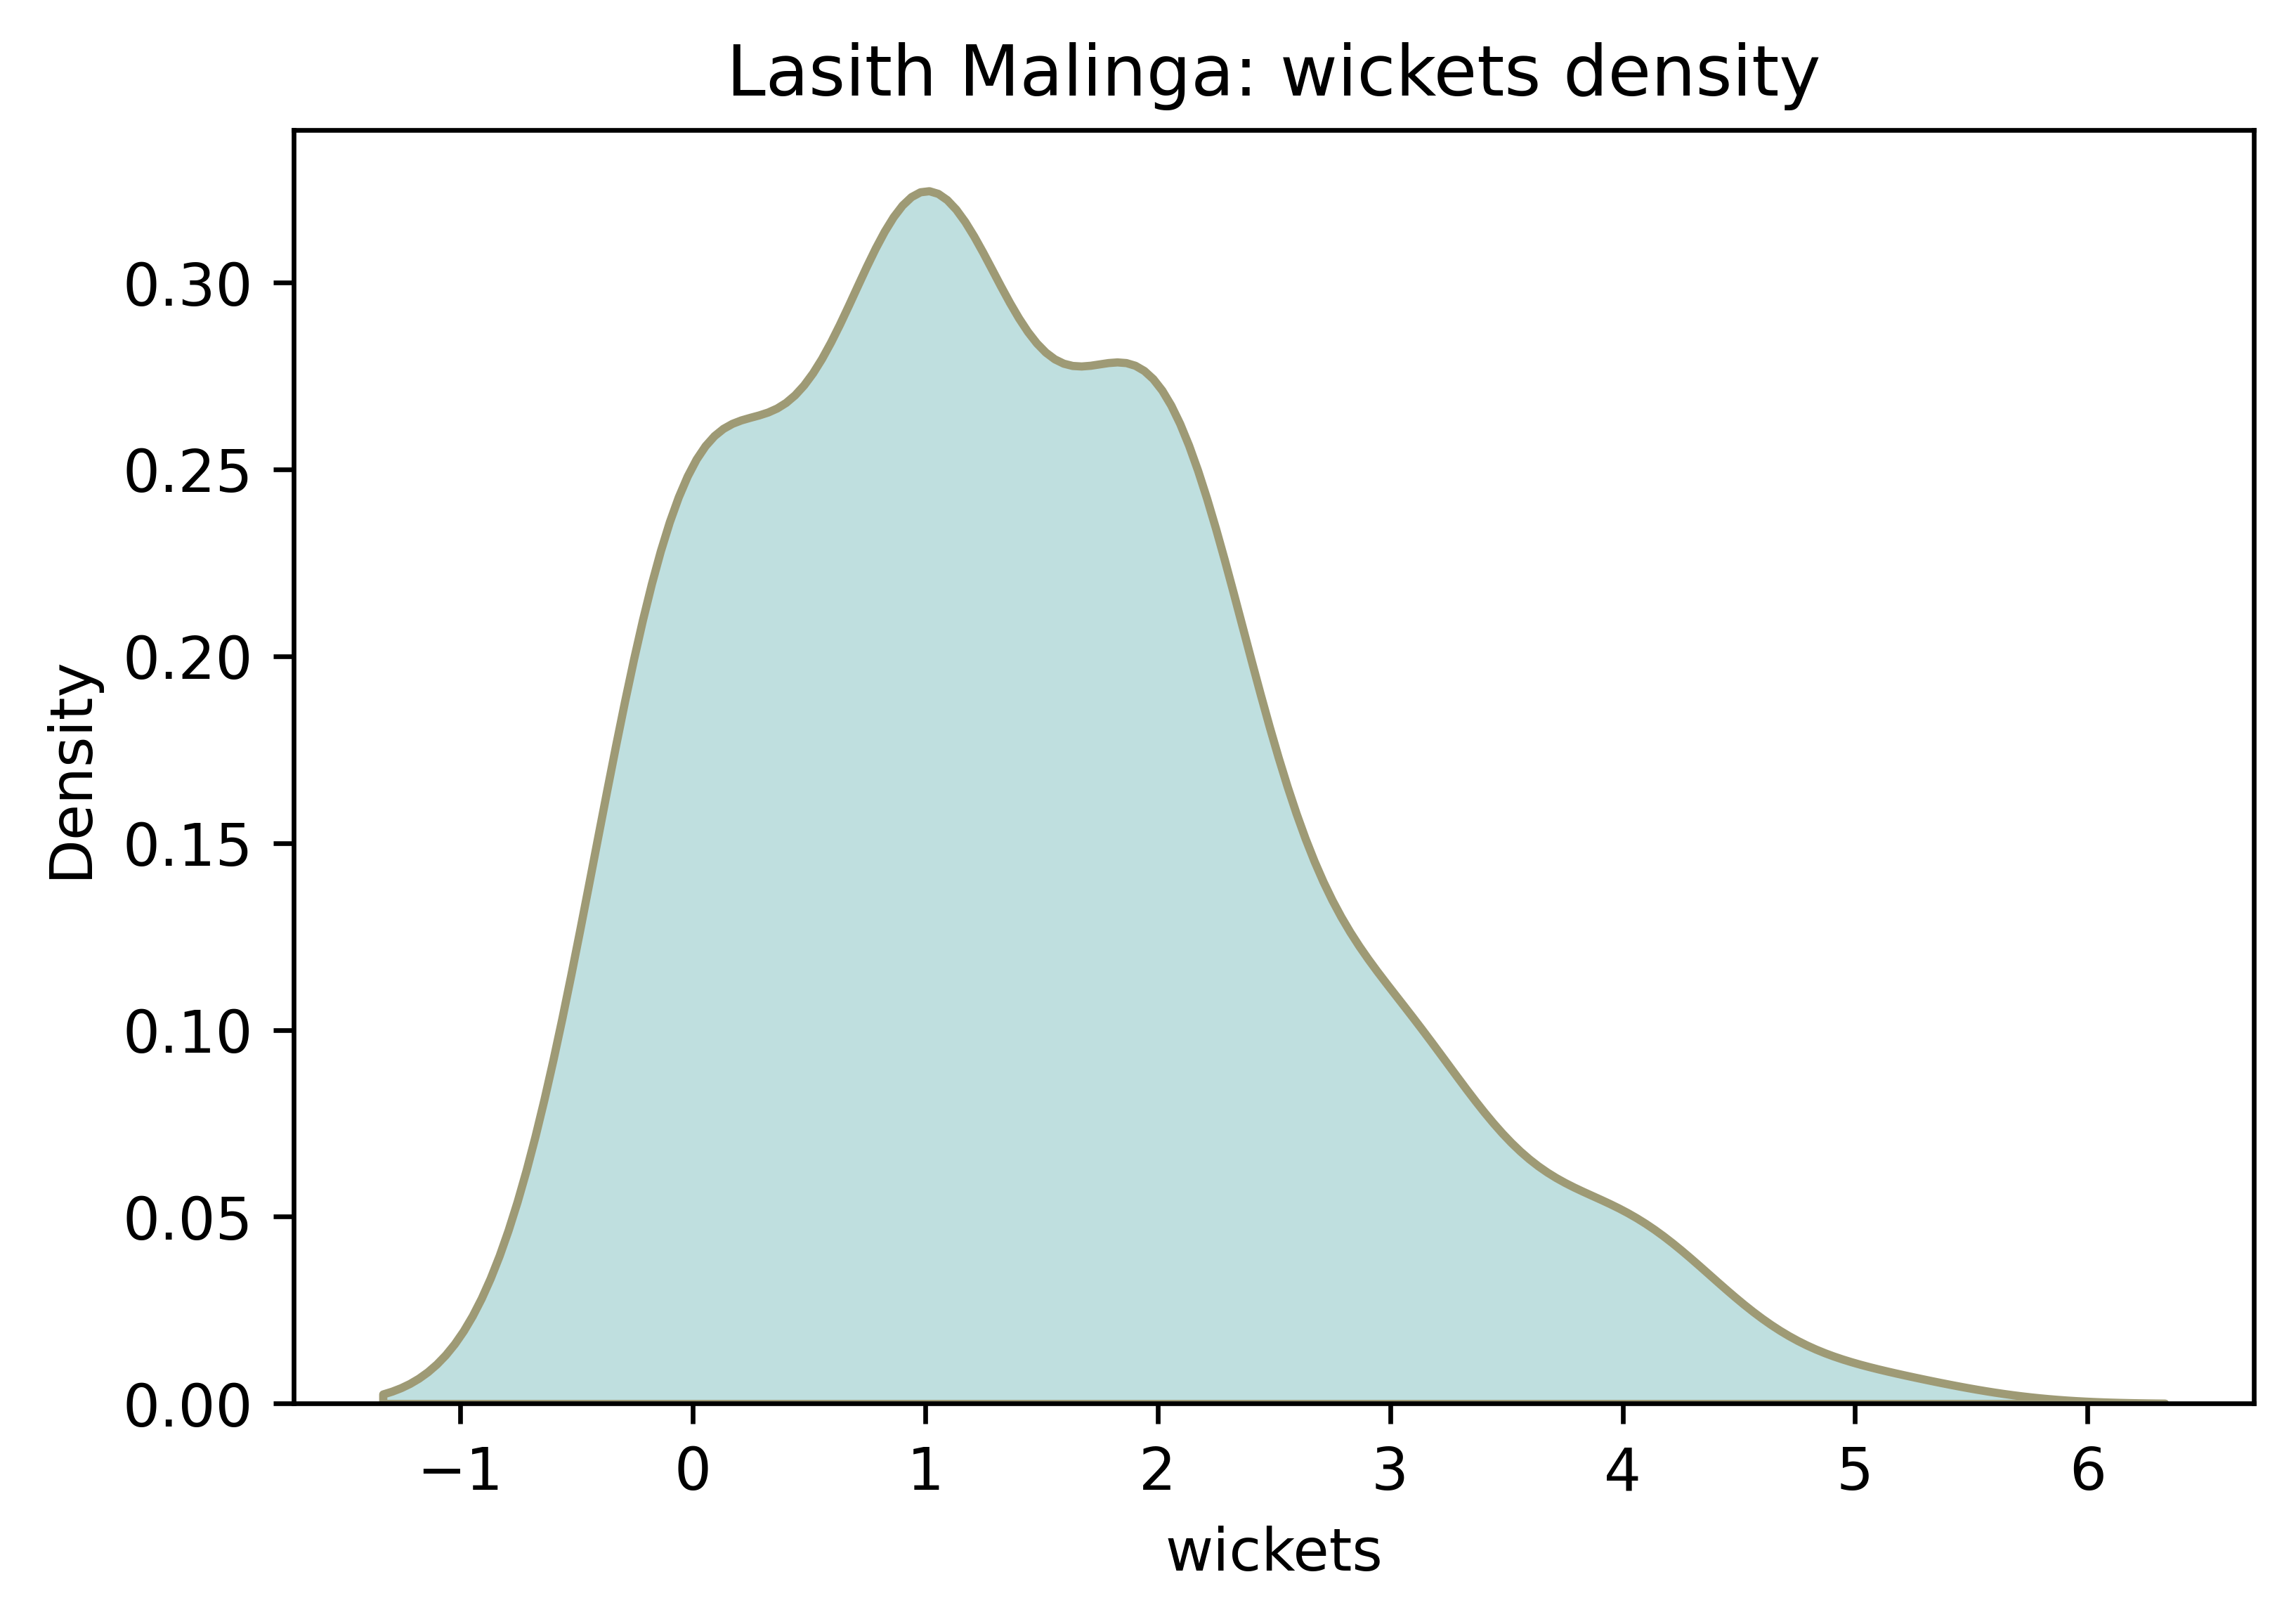

In [97]:
# run per match of given batsmen
def wicket_per_match(bowler):
    run_batsmen = season_bowling_card_df[season_bowling_card_df['fullName'] == bowler]
    run_batsmen = run_batsmen[['wickets']]
    sns.kdeplot(run_batsmen['wickets'], shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("{}: wickets density".format(bowler))

wicket_per_match('Lasith Malinga')

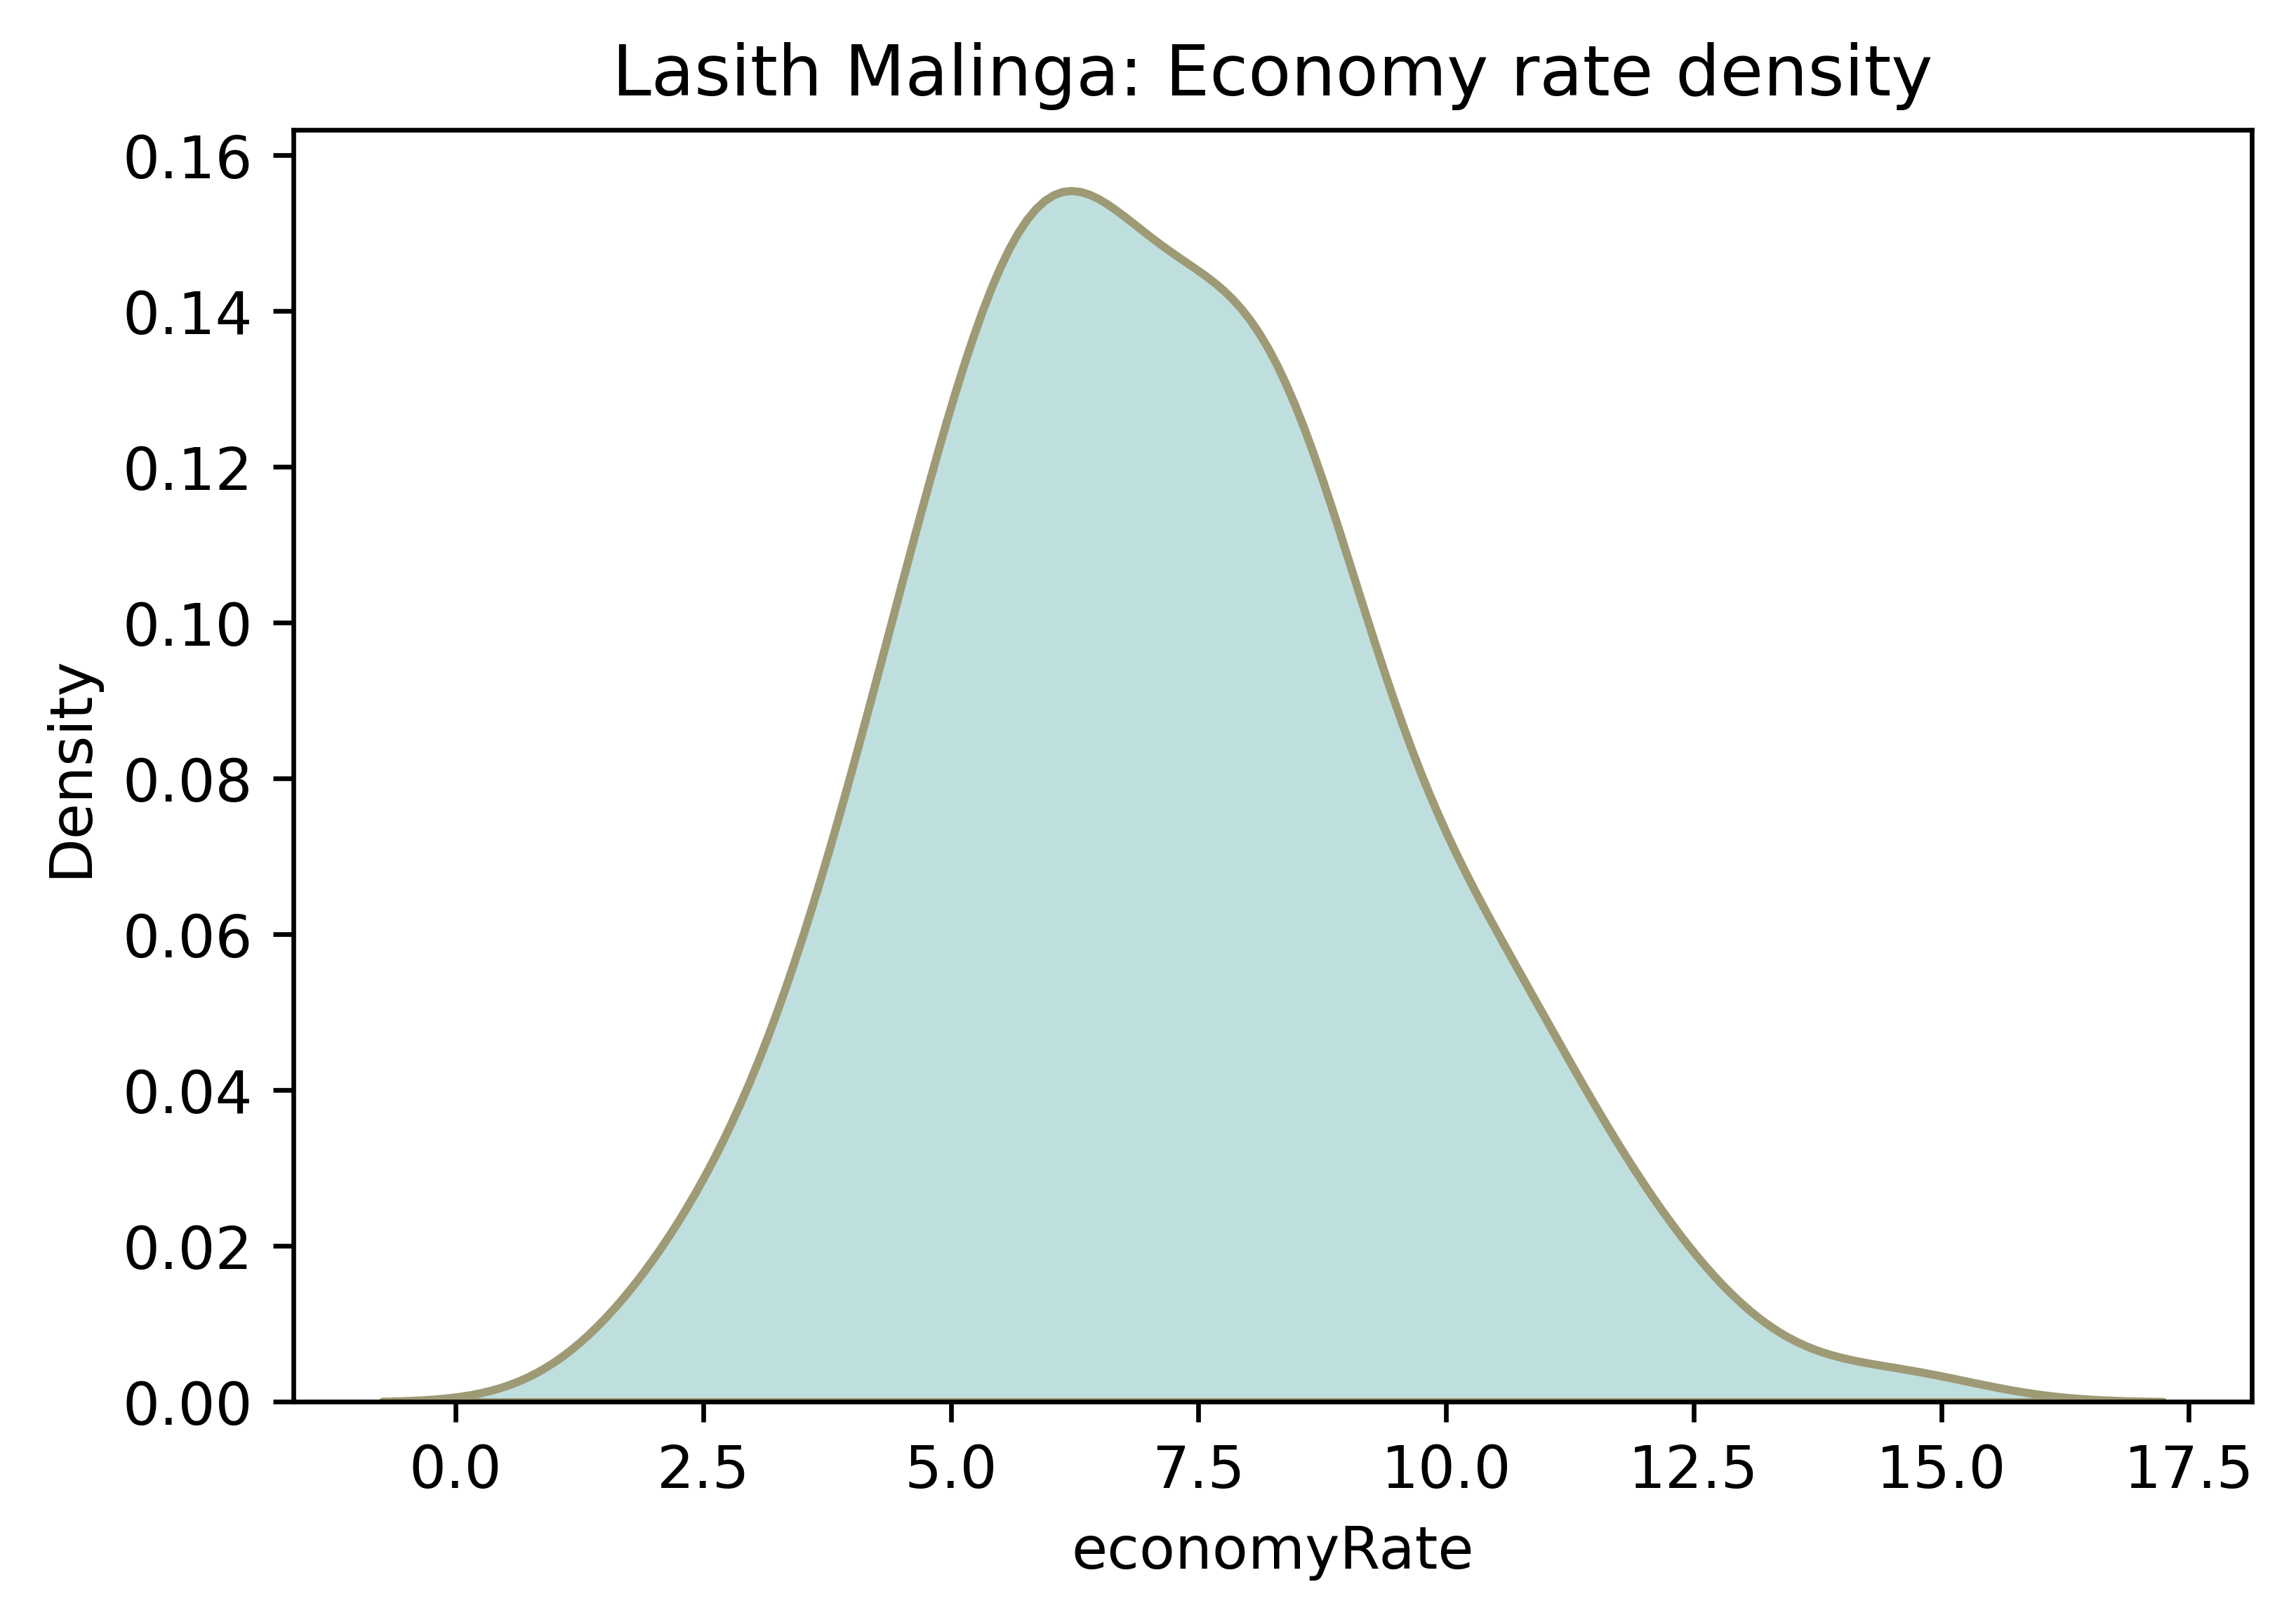

In [96]:
def economy_rate_per_match(bowler):
    strike_bowler = season_bowling_card_df[season_bowling_card_df['fullName'] == bowler]
    strike_bowler = strike_bowler[['economyRate']]
    strike_bowler['economyRate'] = strike_bowler['economyRate'].astype(float)
    sns.kdeplot(strike_bowler['economyRate'], shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("{}: Economy rate density".format(bowler))

economy_rate_per_match('Lasith Malinga')

<ipython-input-95-2e27101d338a>:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



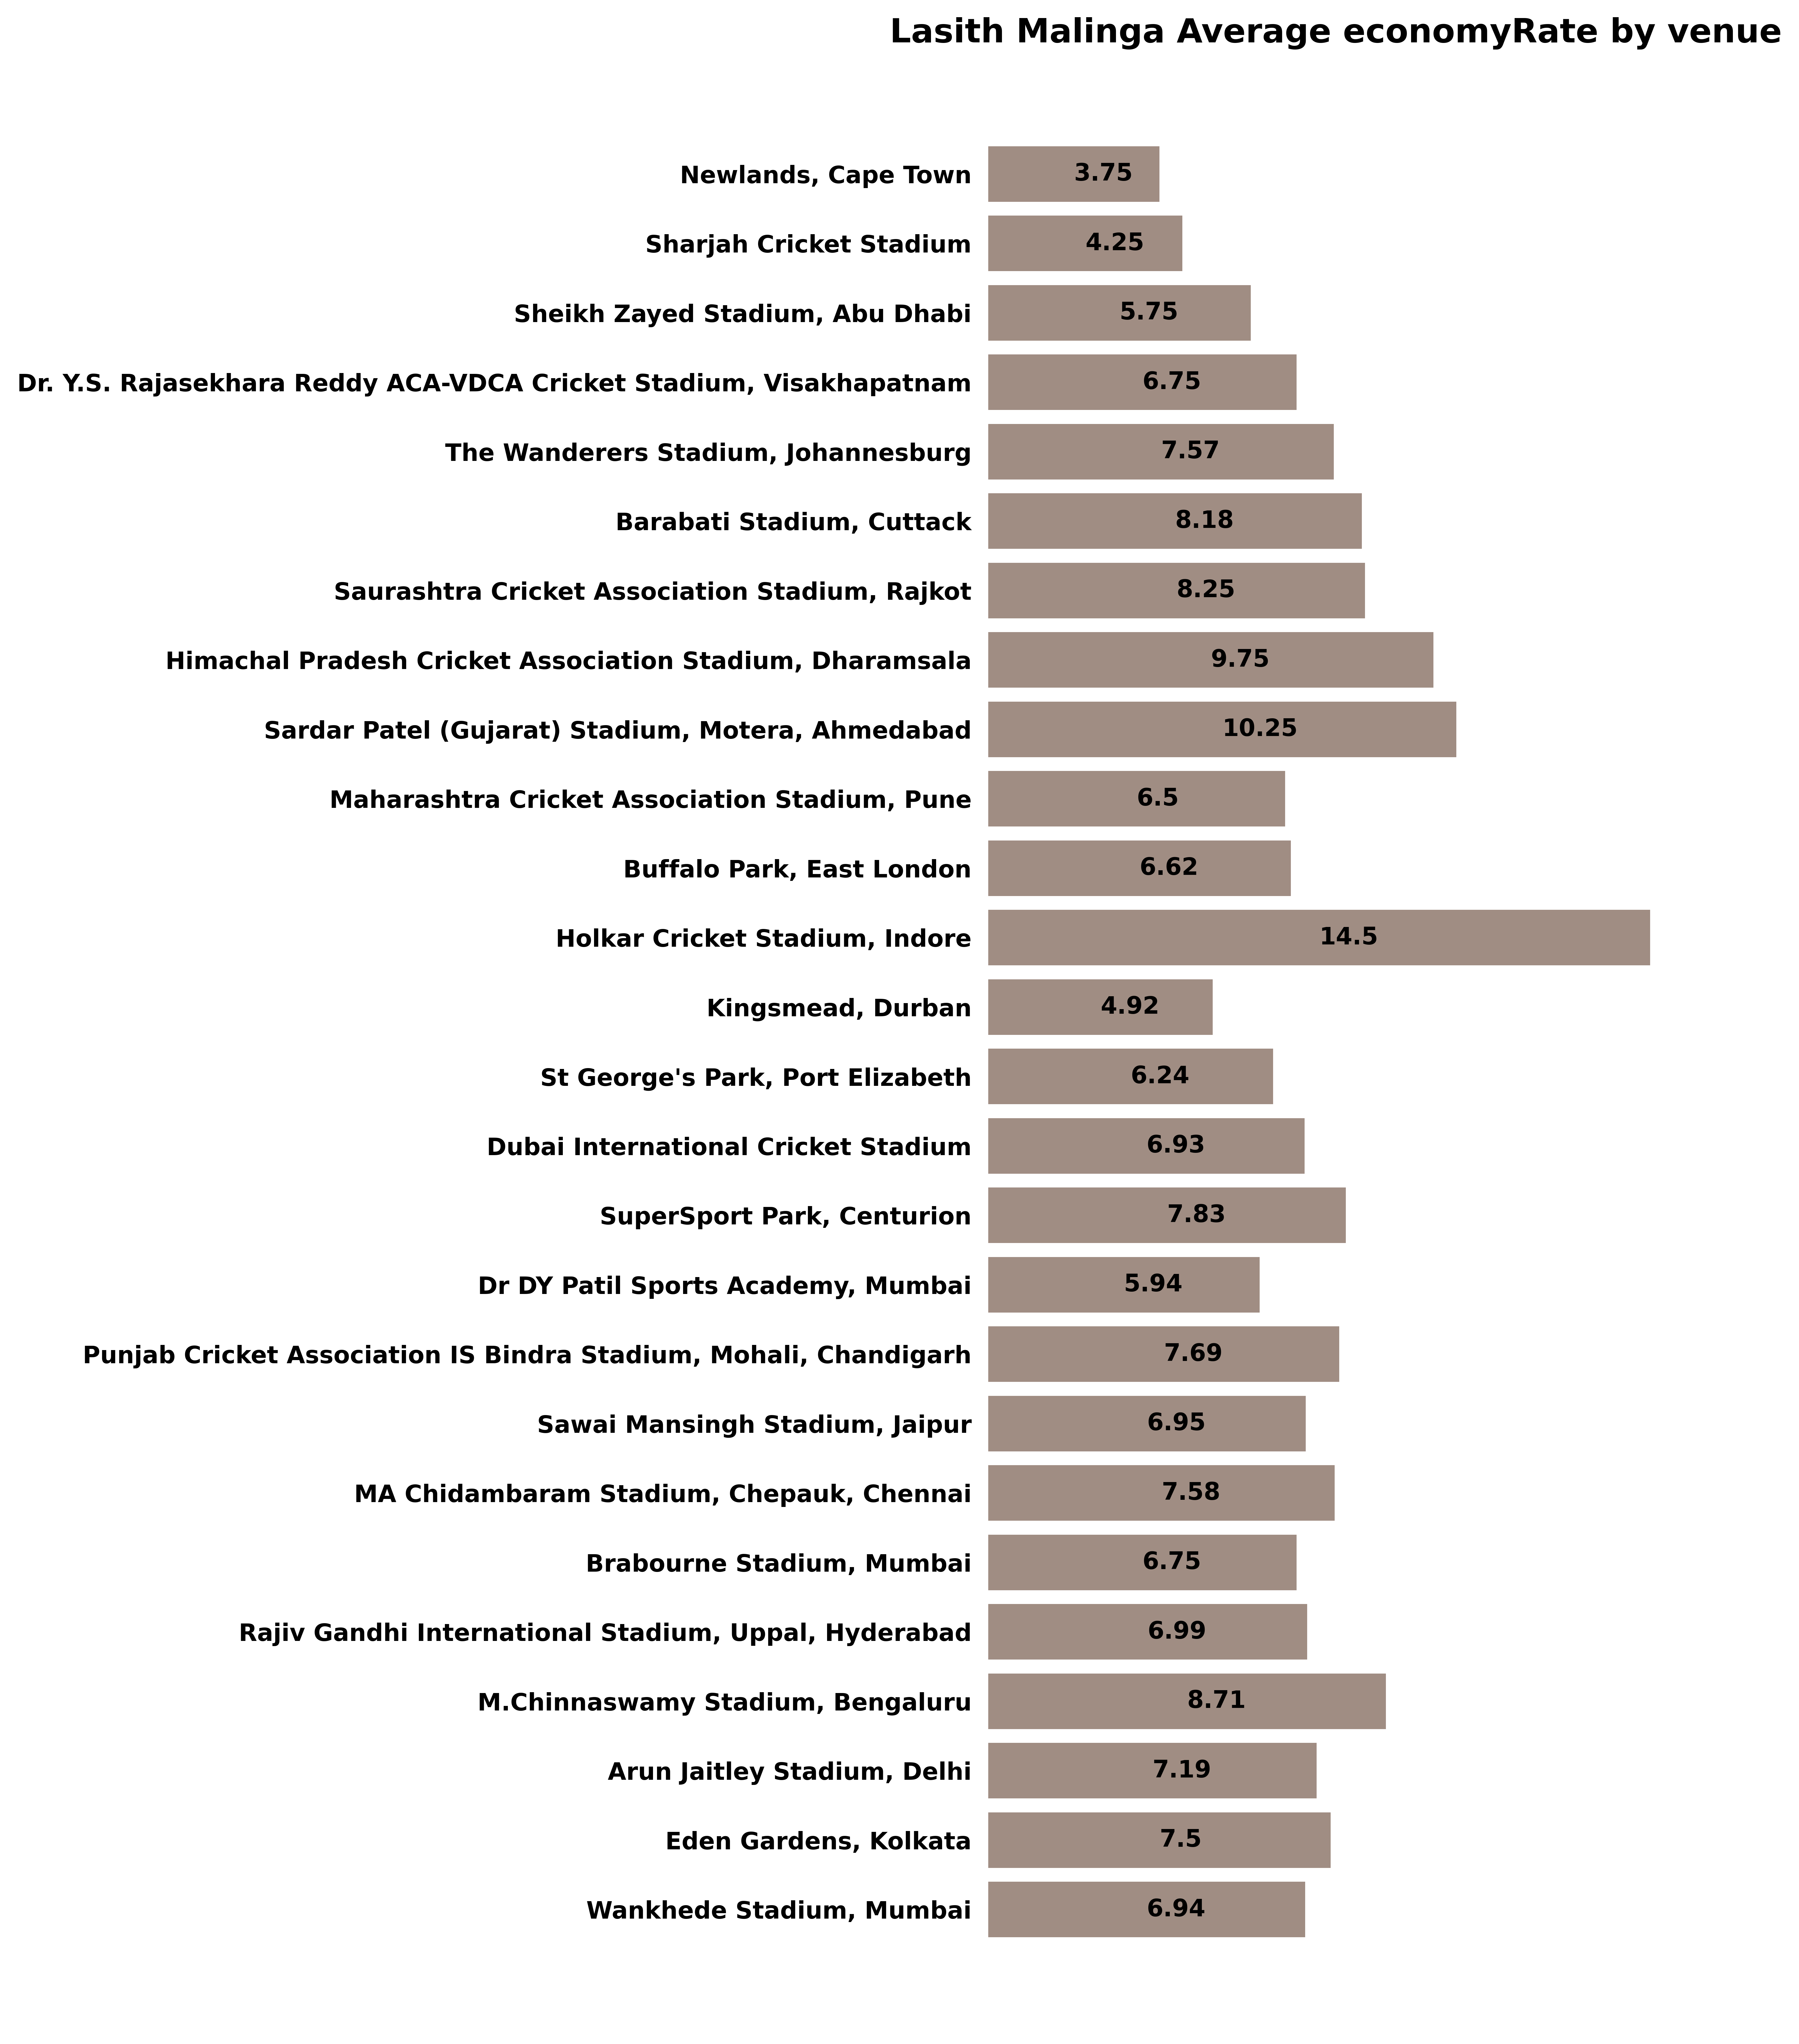

In [95]:
def bowler_wicket_per_venue(bowler):
    bowler_wicket_per_venue = season_bowling_card_df[season_bowling_card_df['fullName'] == bowler]
    bowler_wicket_per_venue = bowler_wicket_per_venue[['economyRate', 'venue']]
    bowler_wicket_per_venue['matches'] = 1
    bowler_wicket_per_venue['economyRate'] = pd.to_numeric(bowler_wicket_per_venue['economyRate'])
    bowler_wicket_per_venue = bowler_wicket_per_venue.groupby(['venue']).sum()
    bowler_wicket_per_venue.reset_index(inplace=True)
    bowler_wicket_per_venue['average'] = bowler_wicket_per_venue['economyRate'] / bowler_wicket_per_venue['matches']
    bowler_wicket_per_venue = bowler_wicket_per_venue.reset_index()
    bowler_wicket_per_venue = bowler_wicket_per_venue.sort_values(by=['economyRate'], ascending=False)

    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 12), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = bowler_wicket_per_venue['venue'], width= bowler_wicket_per_venue['average'], label='economyRate', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(bowler_wicket_per_venue['venue'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} Average economyRate by venue'.format(bowler),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),2)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.show()

bowler_wicket_per_venue('Lasith Malinga')

<ipython-input-82-30f783abf2a2>:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



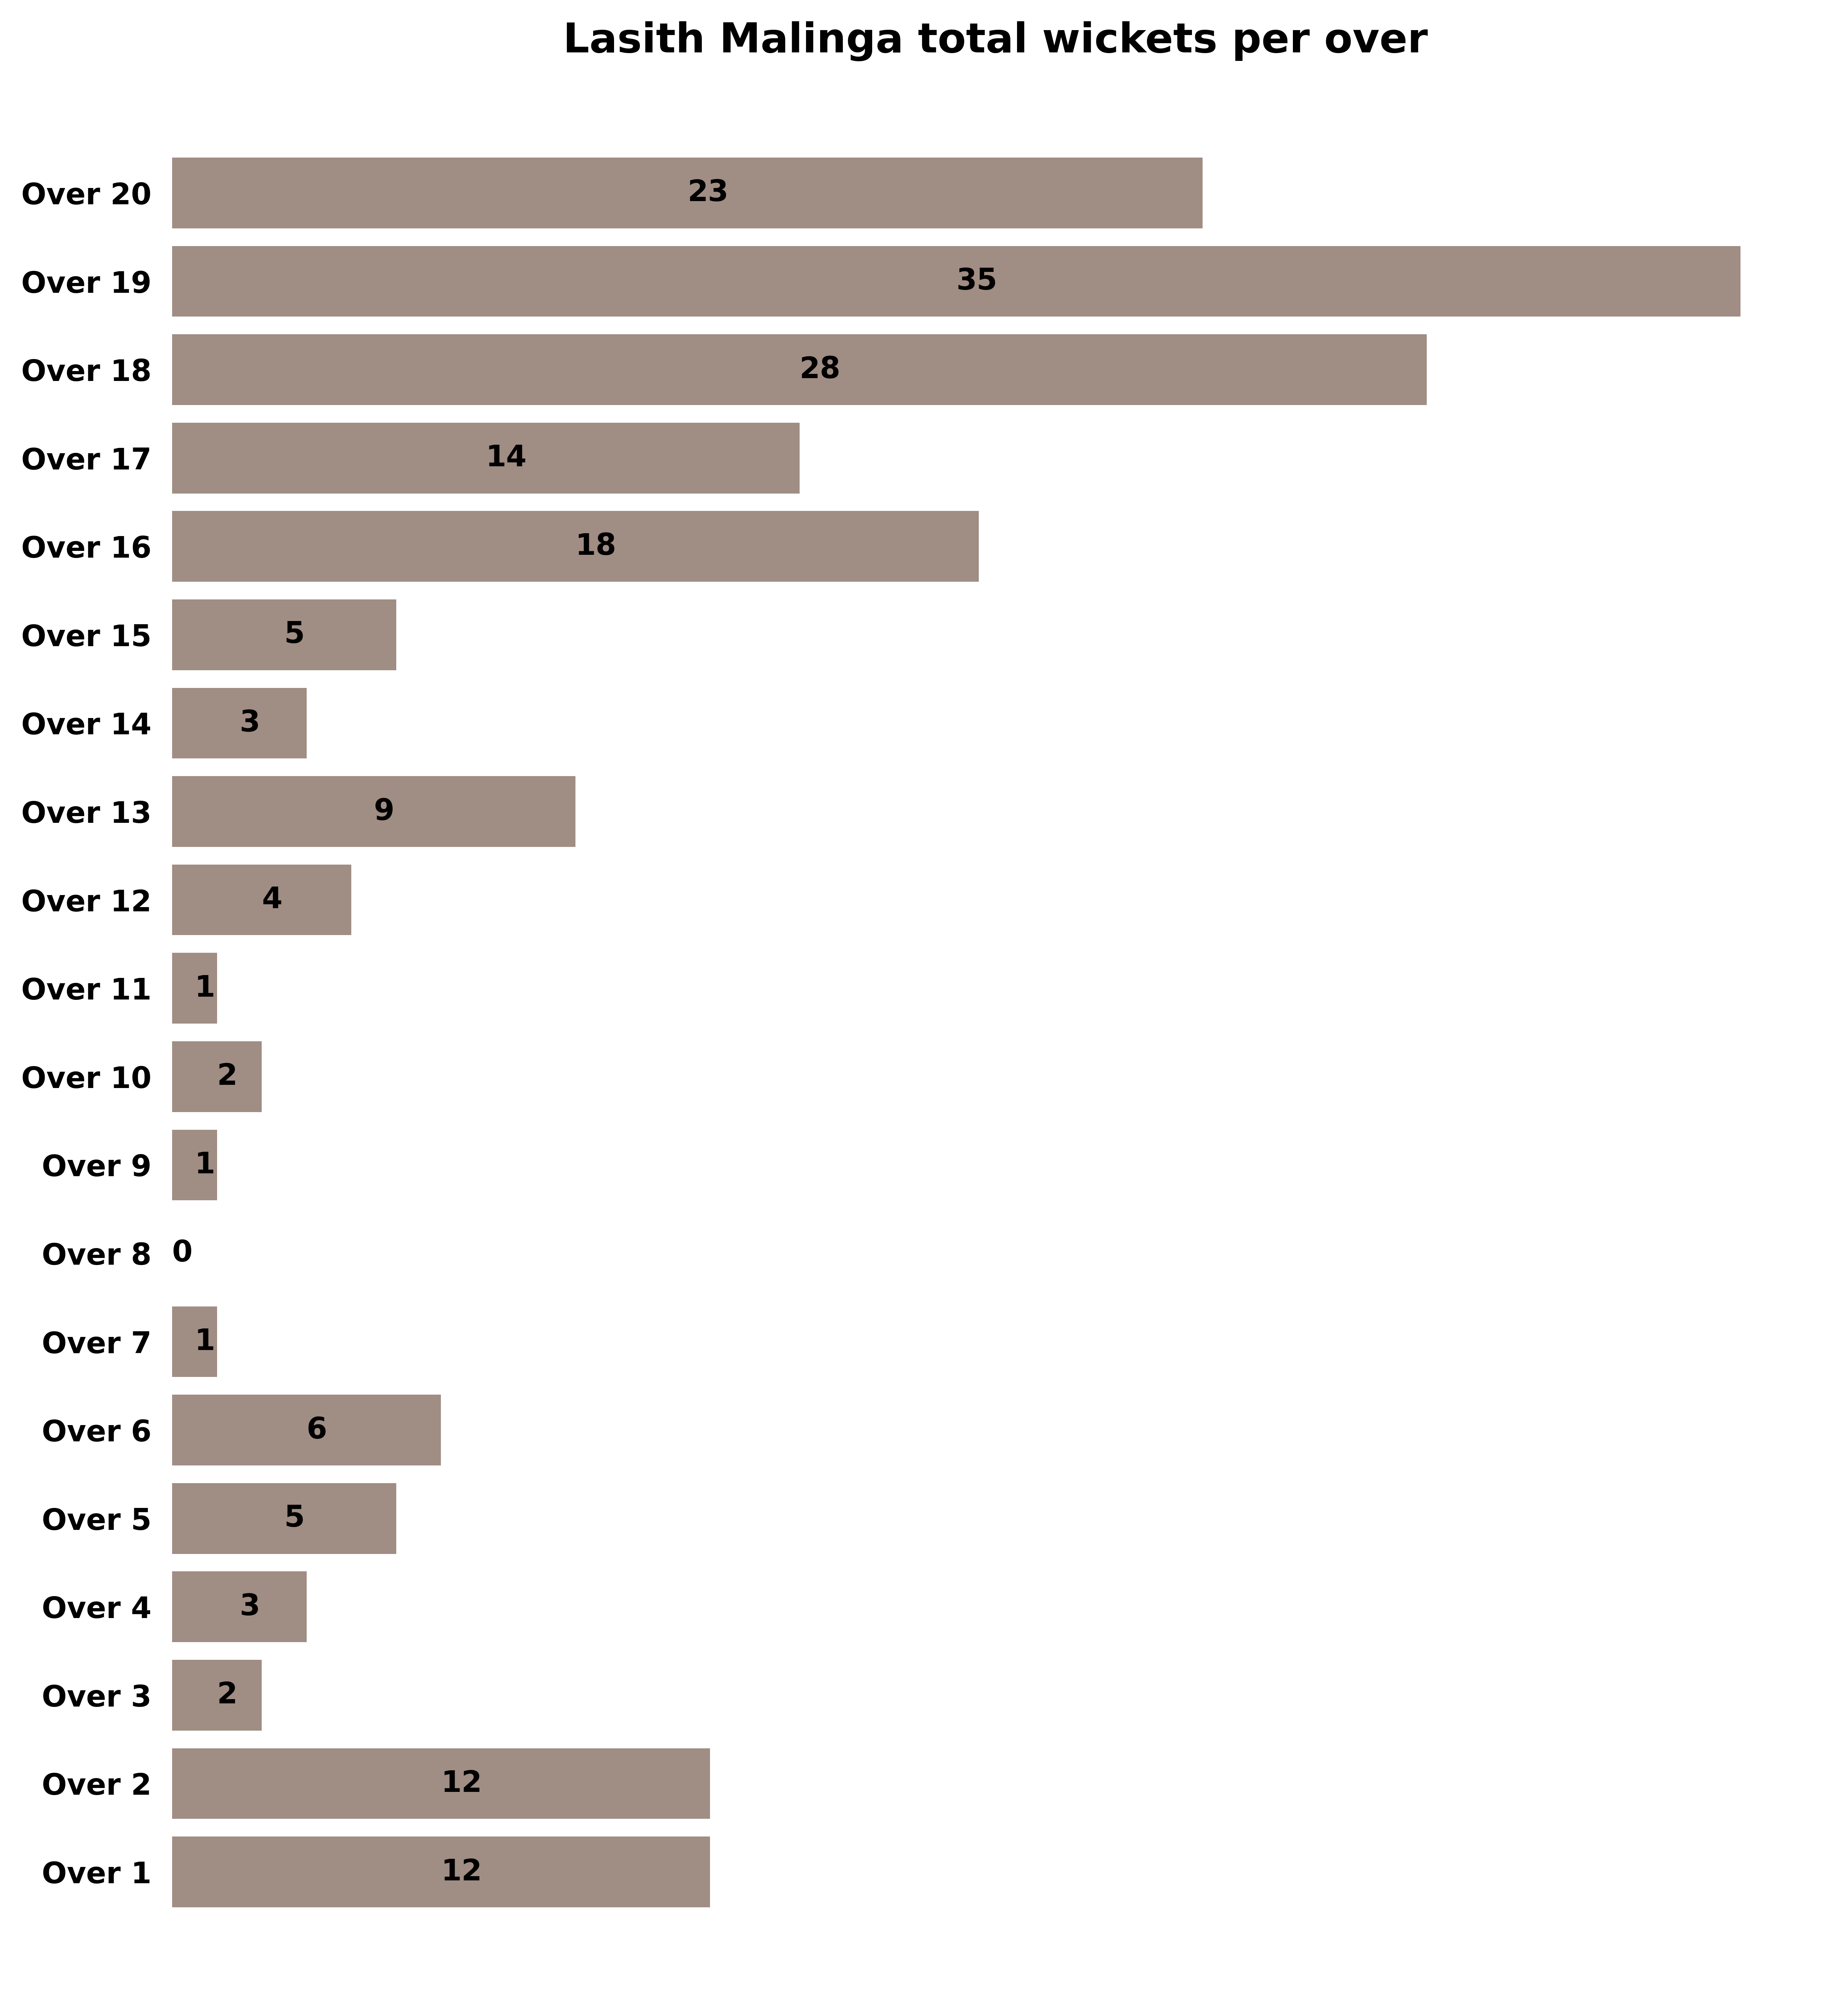

In [82]:
def wickets_per_over(bowler):
    wickets_per_over = season_details_df[season_details_df['bowler1_name'] == bowler]
    wickets_per_over = wickets_per_over[wickets_per_over['isWide'] == False]
    wickets_per_over = wickets_per_over[wickets_per_over['isNoball'] == False]
    wickets_per_over = wickets_per_over[['over','wkt_text']]
    def f(x):
        if x != x:
            return 0
        else:
            return 1
    wickets_per_over['wkt_text'] = wickets_per_over['wkt_text'].map(lambda x: f(x))
    wickets_per_over['times_bowled'] = 1

    wickets_per_over = wickets_per_over.groupby(['over']).sum()
    wickets_per_over['times_bowled'] = wickets_per_over['times_bowled'].map(lambda x : x//6)
    wickets_per_over['avg_wickets'] = wickets_per_over['wkt_text'] / wickets_per_over['times_bowled']
    # wickets_per_over['strike rate'] = wickets_per_over['avg_wickets'] * 100
    wickets_per_over = wickets_per_over.reset_index()
    wickets_per_over['over'] = wickets_per_over['over'].astype(int)
    wickets_per_over['over'] = wickets_per_over['over'].map(lambda x : "Over "+ str(x))

    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 12), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = wickets_per_over['over'], width= wickets_per_over['wkt_text'], label='Wickets', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(wickets_per_over['over'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} total wickets per over'.format(bowler),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    # gs.tight_layout(fig, rect=[0, 0, 1, 1])
    # plt.show()

wickets_per_over('Lasith Malinga')

<ipython-input-94-7a3056c80756>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



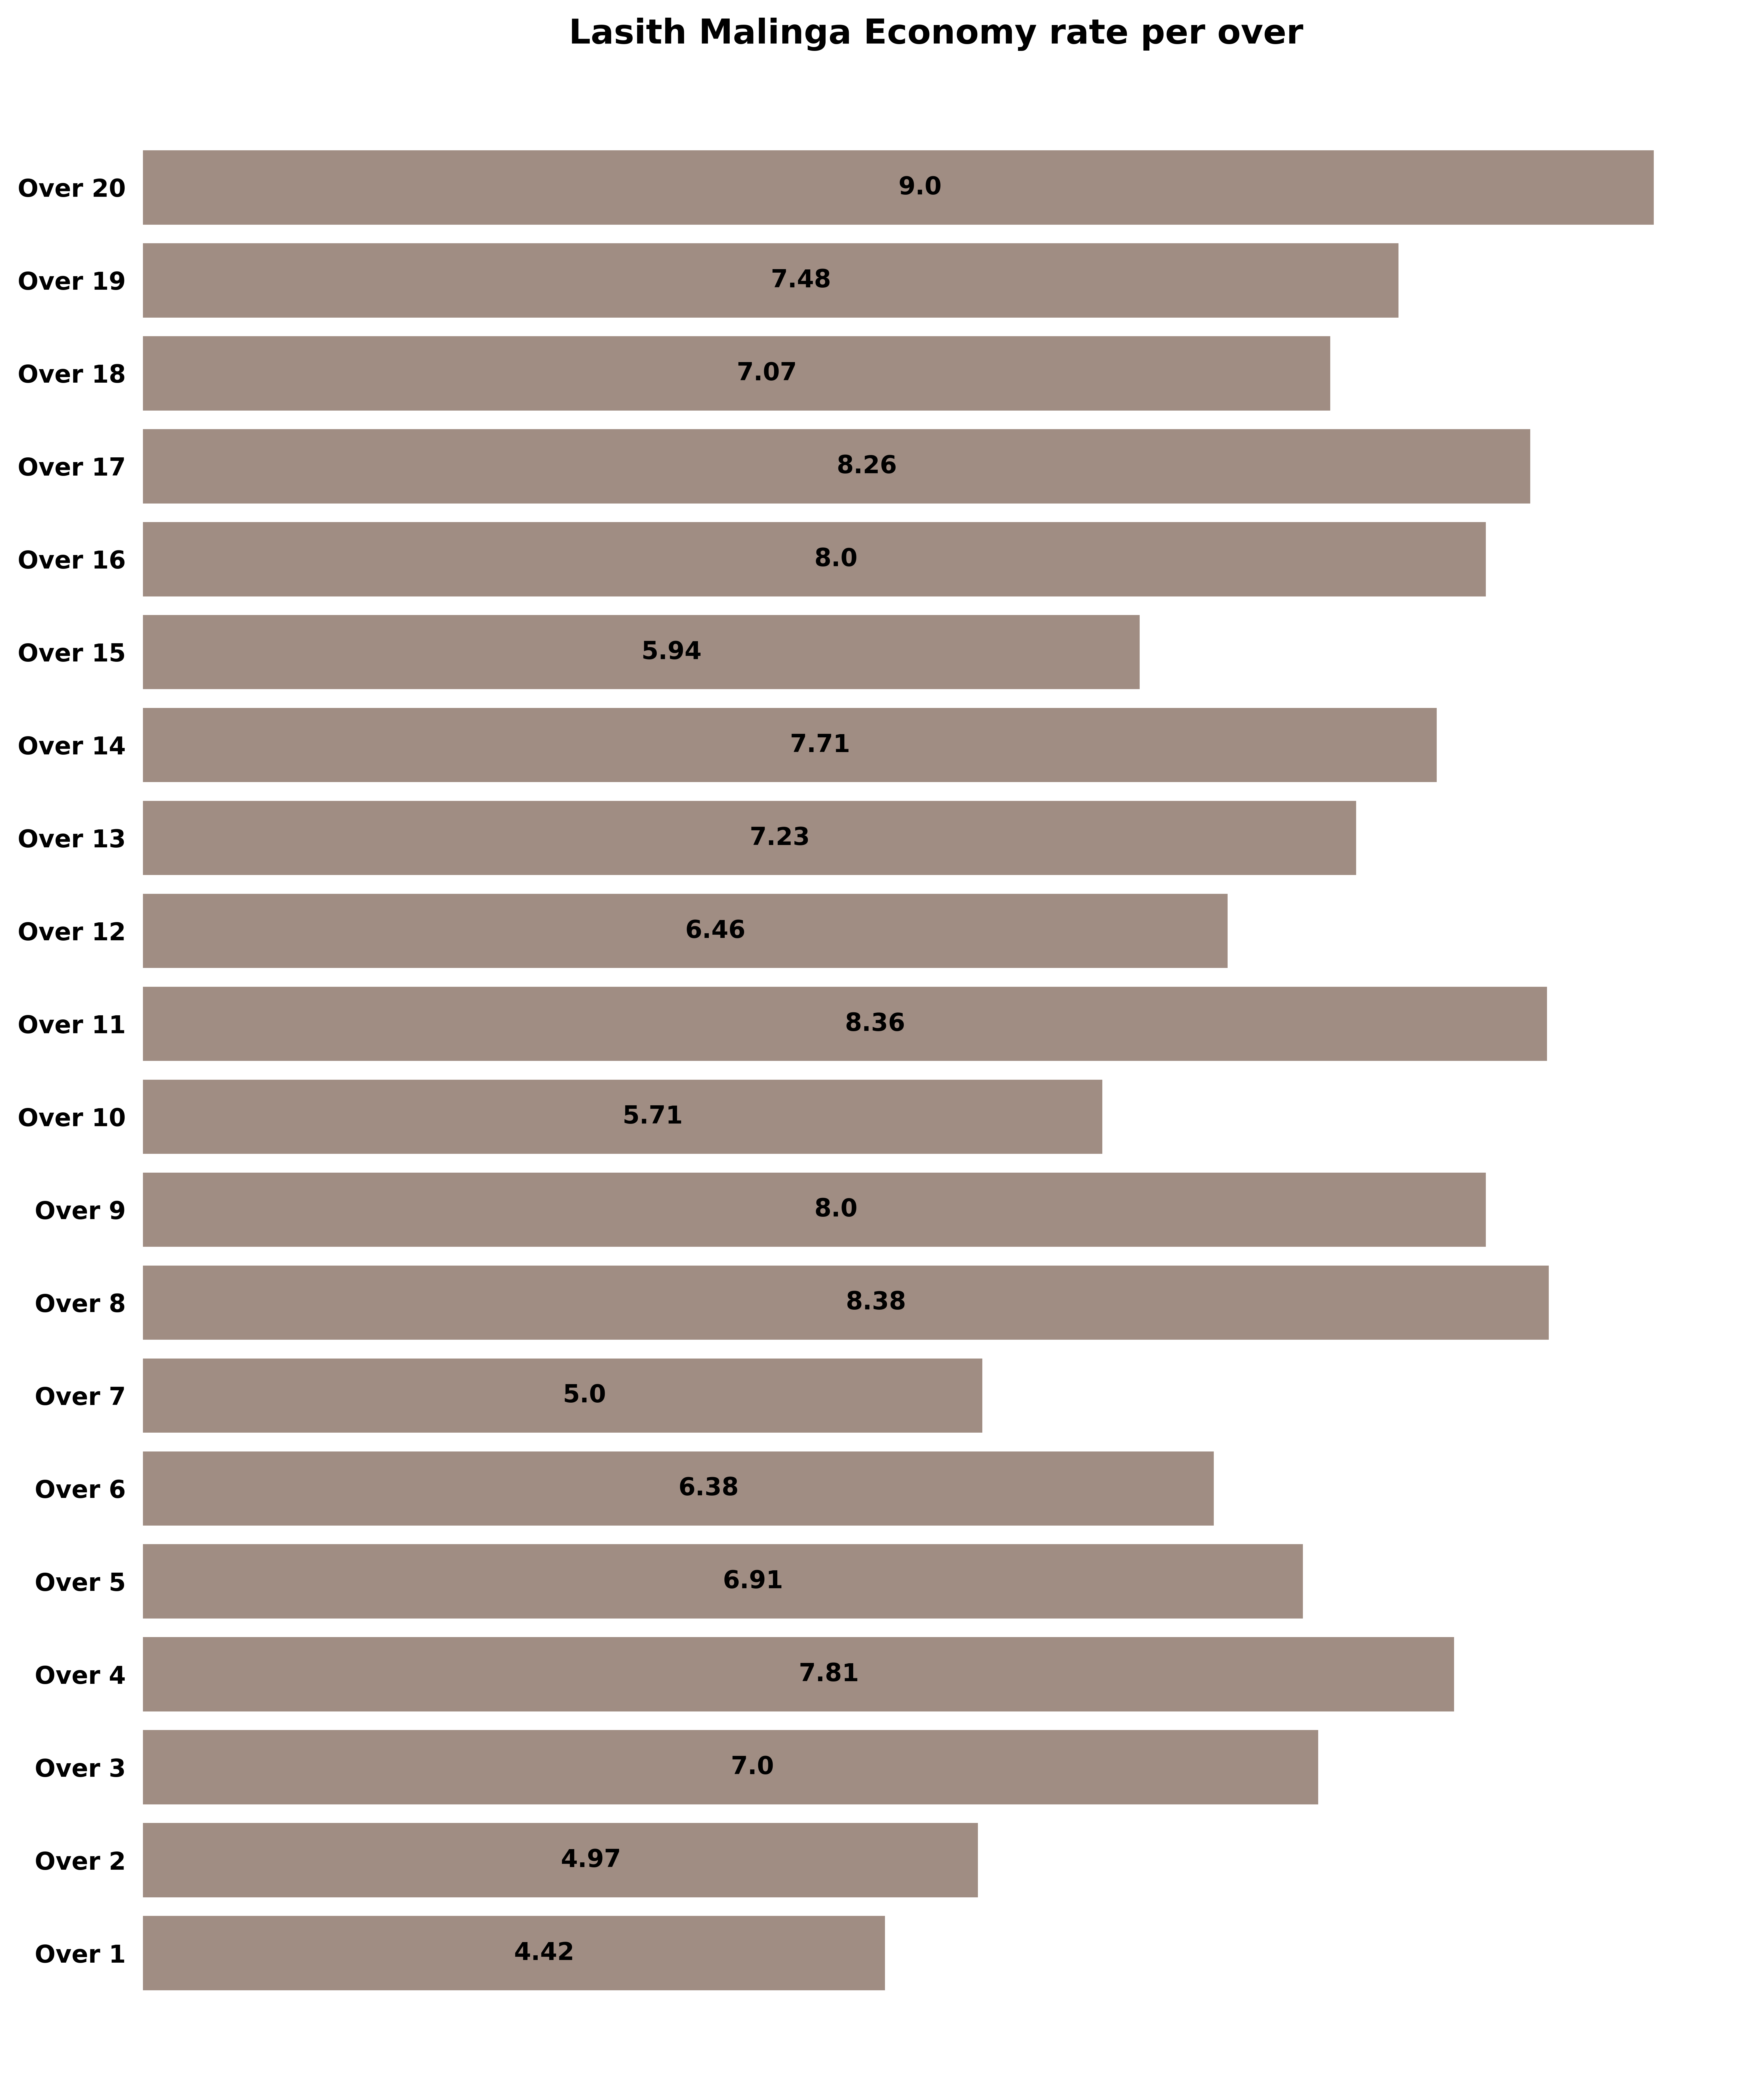

In [94]:
def economy_rate_per_over(bowler):
    runs_per_over = season_details_df[season_details_df['bowler1_name'] == bowler]
    runs_per_over = runs_per_over[runs_per_over['isWide'] == False]
    runs_per_over = runs_per_over[runs_per_over['isNoball'] == False]
    runs_per_over = runs_per_over[['over','runs']]
    runs_per_over['balls'] = 1
    runs_per_over = runs_per_over.groupby(['over']).sum()
    runs_per_over['balls'] = runs_per_over['balls'].map(lambda x:x//6)

    runs_per_over['avg_run'] = runs_per_over['runs'] / runs_per_over['balls'].map(lambda x : max(x,1))
    runs_per_over = runs_per_over.reset_index()
    runs_per_over['over'] = runs_per_over['over'].astype(int)
    runs_per_over['over'] = runs_per_over['over'].map(lambda x : "Over "+ str(x))

    # # plot
    # #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 12), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = runs_per_over['over'], width= runs_per_over['avg_run'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(runs_per_over['over'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} Economy rate per over'.format(bowler),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),2)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.show()

economy_rate_per_over('Lasith Malinga')

In [65]:
bowlers = season_bowling_card_df['fullName'].unique()

def best_powerplay_bowlers(bname):
    runs_per_over = season_details_df[season_details_df['bowler1_name'] == bname]
    runs_per_over = runs_per_over[runs_per_over['isWide'] == False]
    runs_per_over = runs_per_over[runs_per_over['isNoball'] == False]
    runs_per_over = runs_per_over[['over','runs']]
    runs_per_over['balls'] = 1
    runs_per_over = runs_per_over.groupby(['over']).sum()
    runs_per_over['balls'] = runs_per_over['balls'].map(lambda x:x//6)
    runs_per_over = runs_per_over.reset_index()

    powerplay = runs_per_over.loc[runs_per_over["over"].isin(range(7))]
    death = runs_per_over.loc[runs_per_over["over"].isin(range(16,21))]
    
    ppf = powerplay.sum()
    deathf = death.sum()

    ans = [40,40]
    # Atleast bowled 40 overs in Powerplay and Death
    if ppf['balls'] >= 40:
        ans[0] = ppf["runs"]/ppf["balls"]
    if deathf['balls'] >= 40:
        ans[1] = deathf["runs"]/deathf["balls"]
    return ans

pp_perf, dth_perf = {}, {}
for b in bowlers:
    getval = best_powerplay_bowlers(b)
    if getval[0] < 40:
        pp_perf[b] = getval[0]
    if getval[1] < 40:
        dth_perf[b] = getval[1]


In [66]:
pp_perf = {k: v for k, v in sorted(pp_perf.items(), key=lambda item: item[1])}
dth_perf = {k: v for k, v in sorted(dth_perf.items(), key=lambda item: item[1])}

In [67]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

best_pp_bowlers = take(5, pp_perf.items())
best_dth_bowlers = take(5, dth_perf.items())

pp_perf_r = {k: v for k, v in sorted(pp_perf.items(), key=lambda item: -item[1])}
dth_perf_r = {k: v for k, v in sorted(dth_perf.items(), key=lambda item: -item[1])}

worst_pp_bowlers = take(5, pp_perf_r.items())
worst_dth_bowlers = take(5, dth_perf_r.items())

In [68]:
print(best_pp_bowlers)
print(best_dth_bowlers)
print(worst_pp_bowlers)
print(worst_dth_bowlers)

[('Jofra Archer', 5.245614035087719), ('Bhuvneshwar Kumar', 5.884615384615385), ('Dirk Nannes', 6.017543859649122), ('Dale Steyn', 6.026455026455026), ('Lasith Malinga', 6.118918918918919)]
[('Ravichandran Ashwin', 7.467532467532467), ('Rashid Khan', 7.530612244897959), ('Sunil Narine', 7.606896551724138), ('Lasith Malinga', 7.833333333333333), ('Harbhajan Singh', 8.2)]
[('Ankit Rajpoot', 8.933333333333334), ('Siddarth Kaul', 8.907407407407407), ('Khaleel Ahmed', 8.804347826086957), ('Manpreet Gony', 8.666666666666666), ('Pradeep Sangwan', 8.563636363636364)]
[('Ashok Dinda', 10.907692307692308), ('Jaydev Unadkat', 10.833333333333334), ('Ishant Sharma', 10.793650793650794), ('Kieron Pollard', 10.775510204081632), ('Andre Russell', 10.677966101694915)]
